In [211]:
%matplotlib inline


In [212]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

# File to Load (Remember to change these)
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
df_city=pd.read_csv(city_csv)
df_ride=pd.read_csv(ride_csv)

# Combine the data into a single dataset
df=pd.merge(df_city,df_ride, on='city',how='outer')

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

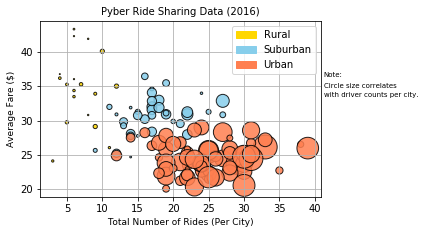

In [213]:
# Obtain the x and y coordinates for each of the three city types
df_city_type=df.groupby(['type','city'])
df_city_fare=df_city_type['fare'].mean()
df_city_ride=df_city_type['ride_id'].count()
df_city_driver=df_city_type['driver_count'].sum()

# Build the scatter plots for each city types
colors=[]
for types in df_city_type['type']:
   if 'Urban' in str(types):
       c='coral'
       colors.append(c)
   if 'Suburban' in str(types):
       c='skyblue'
       colors.append(c)
   if 'Rural' in str(types):
       c='gold'
       colors.append(c)
plt.scatter(x=df_city_ride, y=df_city_fare, marker="o", c=colors, edgecolors="black",
            s=(df_city_driver)/4, alpha=0.85)
gold_patch = mpatches.Patch(color='gold', label='Rural')
blue_patch = mpatches.Patch(color='skyblue', label='Suburban')
coral_patch = mpatches.Patch(color='coral', label='Urban')
plt.legend(handles=[gold_patch, blue_patch, coral_patch])
plt.grid()
plt.xlabel('Total Number of Rides (Per City)', size=9)
plt.ylabel('Average Fare ($)',size=9)
plt.title('Pyber Ride Sharing Data (2016)',size=10)
plt.annotate('Note:', xy=(1.01,0.68), xycoords='axes fraction',size=7)
plt.annotate('Circle size correlates', xy=(1.01,0.62), xycoords='axes fraction',size=7)
plt.annotate('with driver counts per city.', xy=(1.01,0.57), xycoords='axes fraction',size=7)
plt.subplots_adjust(left=0.1, bottom=0.09, right=0.75, top=0.7, wspace=0.5 , hspace=0.50)

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

plt.savefig(r"C:\Users\Owner\Documents\School\Homework\Matplotlib_Week_5\Pyber_ride_sharing.png")
#Show plot




In [214]:
plt.show()

## Total Fares by City Type

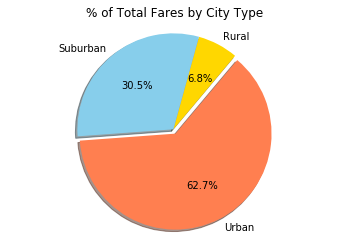

In [215]:
# Calculate Type Percents

# Build Pie Chart
df_types_group=df.groupby(df['type'])
df_types_fare=df_types_group['fare'].sum()
df_types_ride=df_types_group['ride_id'].count()
df_types_driver=df_types_group['driver_count'].sum()

plt.figure(1)
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
plt.pie(df_types_fare,explode=(0,0,0.05), colors=colors, labels=labels,shadow=True,
       autopct="%1.1f%%", startangle=50)
plt.title('% of Total Fares by City Type')
plt.axis("equal")

# Save Figure

plt.savefig(r"C:\Users\Owner\Documents\School\Homework\Matplotlib_Week_5\Pyber_pct_fare.png")
# Show Figure
plt.show()

## Total Rides by City Type

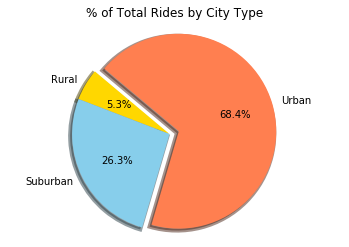

In [216]:
# Calculate Ride Percents
plt.figure(2)
plt.pie(df_types_ride, explode=(0,0,0.1), colors=colors, labels=labels, shadow=True, wedgeprops = {'linewidth':4},
       autopct="%1.1f%%", startangle=500)
plt.title('% of Total Rides by City Type')
plt.axis("equal")

# Build Pie Chart

# Save Figure
plt.savefig(r"C:\Users\Owner\Documents\School\Homework\Matplotlib_Week_5\Pyber_total_ride.png")

#Show plot
plt.show()

## Total Drivers by City Type

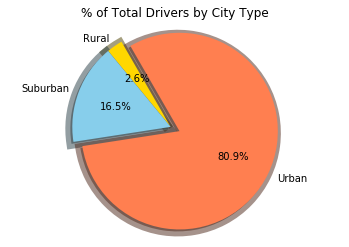

In [217]:
# Calculate Driver Percents
df_city_type_only=df_city.groupby('type')['driver_count'].sum()
plt.figure(3)
plt.pie(df_city_type_only, explode=(0,0,0.1), colors=colors, labels=labels, shadow=True, wedgeprops = {'linewidth': 10},
       autopct="%1.1f%%", startangle=3000)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")
# Build Pie Charts

# Save Figure
plt.savefig(r"C:\Users\Owner\Documents\School\Homework\Matplotlib_Week_5\Pyber_total_driver.png")

# Show Figure
plt.show()
